In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
palette = 'muted'
sns.set_palette(palette); sns.set_color_codes(palette)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
matplotlib.style.use('fivethirtyeight')
matplotlib.style.use('seaborn-talk')
import os
import collections

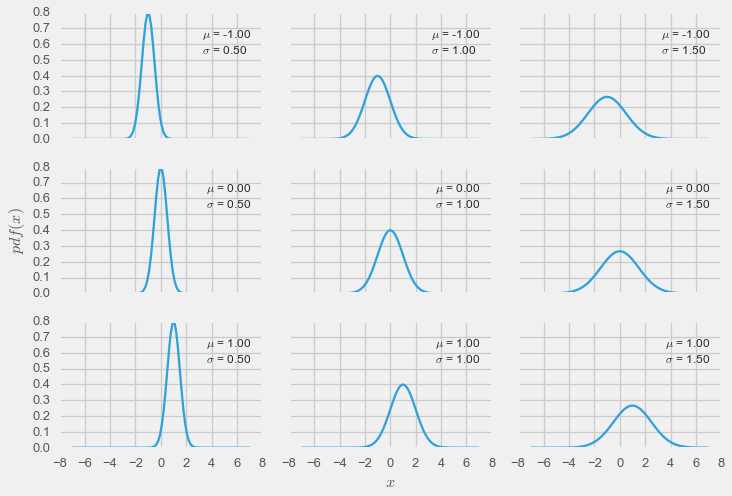

In [2]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 100)
f, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True, sharey=True)
for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = stats.norm(mu, sd).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, 
        label="$\\mu$ = {:3.2f}\n$\\sigma$ = {:3.2f}".format(mu, sd), alpha=0)
        ax[i,j].legend(fontsize=12)
ax[2,1].set_xlabel('$x$', fontsize=16)
ax[1,0].set_ylabel('$pdf(x)$', fontsize=16)
plt.tight_layout()
plt.savefig('B04958_01_01.png', dpi=300, figsize=(5.5, 5.5))

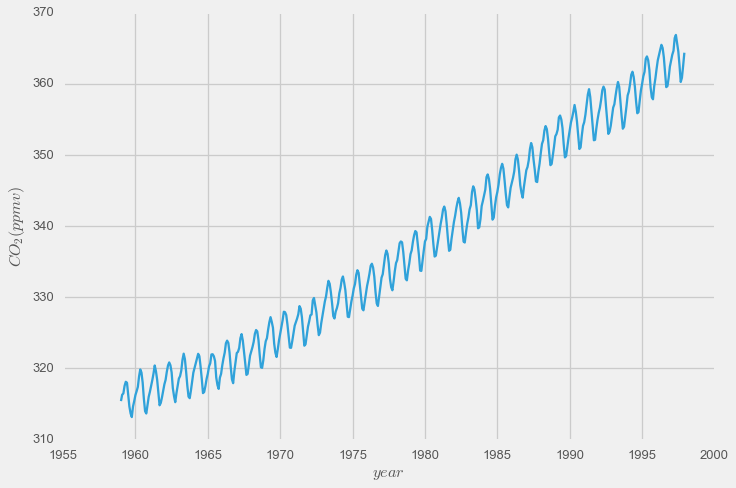

In [4]:
data = np.genfromtxt('mauna_loa_CO2 (1).csv', delimiter=',')
plt.plot(data[:,0], data[:,1])
plt.xlabel('$year$', fontsize=16)
plt.ylabel('$CO_2 (ppmv)$', fontsize=16)
plt.savefig('B04958_01_02.png', dpi=300, figsize=(5.5, 5.5))

## Bayes' theorem and statistical inference

$p(H \hspace{.1cm} | \hspace{.1cm} D) = \frac{p( D \hspace{.1cm} | \hspace{.1cm} H) p(H)}{p(D)}$


* $p(H)$: Prior
* $p(D \hspace{.1cm} | \hspace{,1cm} H)$: Likelihood
* $p(H \hspace{.1cm} | \hspace{.1cm} D)$: Posterior
* $p(D)$: Evidence


If we ignore the evidence, we can write Bayes' theorem as a proportionality:

$p(H \hspace{.1cm} | \hspace{.1cm} ) \propto p(D \hspace{.1cm} | \hspace{.1cm} H) p(H)$

Understanding the exact role of each term will take some time and will also require some examples, and that's what the rest of the book is for.

# Single parameter inference

Probabilities are used to measure the uncertainty we have about parameters, and Bayes' theorem is the mechanism to correctly update those probablities in the light of new data, hopefully reducing our uncertainty.

Now that we know what Bayesian statistics is, let's learn how to do Bayesian statistics with a simple example. We are going to begin inferring a single unknown parameter.

# The coin-flipping problem

The coin-flip problem is a classical problem in statistics and goes like this. We toss a coin a number of times and record how many heads and tails we get. Based on this data we try to answer questions such as is the coin fair? Or, more generally, how biased is the coin? While this problem may sound dull, we should not underestimate it. The coin-flipping problem is a great example to learn the basics of Bayesian statistics; on the one hand, it is about tossing coins, something familiar to almost anyone; on the other, it is a simple model that we can solve and compute with ease. Besides, many real problems consist of binary mutually exclusive outcomes such as 0 or 1, positive or negative, odds or evens, span or ham, safe or unsafe, healthy or unhealthy, and so on. Thus, even when we are talking about coins, this model applies to any of those problems.

In order to estimate the bias of a coin, and in general to answer any question in a Bayesian setting, we will need data and a probabilistic model. For this example, we will assume that we have already tossed a coin a number of times and we have recorded the number of observed heads, so the data part is done. Getting the model will take a little bit more effort. Since this is our first model, we will do all the necessary math (don't be afriad, I promise it will be painless) and we will proceed step by step very slowly. In the next chapter will revisit this problem by using PyMC3 to solve it numerically, that is, without us doing the math. Instead we will let PyMC3 and our computer do the math.

# The General Model

The first thing we will do is generalize the concept of bias. We will say that a coin with a bias of 1 will always land heads, one with a bias of 0 will always land tails, and one with a bias of 0.5 will land half of the time heads and half of the time tails. To represent bias, will use the parmaeter $\theta$, and to represent the total number of head for $N$ number of tosses, we will use the variable $y$. According to Baye's theorem, we have the following formula:

$
p(\theta \hspace{.1cm} | \hspace{.1cm} y) \propto p(y \hspace{.1cm} | \hspace{.1cm} \theta) p(\theta)
$

Notice that we need to specify which prior $p(\theta)$ and likelihood $p(y \hspace{.1cm} | \hspace{.1cm} \theta)$ we will use.
Let's start with the likelihood.

# Choosing the Likelihood

Let's assume that a coin toss does not affect other tosses, that is, we are assuming coin tosses are independent of each other. Let's also assume that only two outcomes are possible, heads or tails. I hope you agree that these are very reasonable assumptions to make for our problem. Given these assumptions, a good candidate for the ilkelihood is the binomial distribution:

$
p(y \hspace{.1cm} | \hspace{.1cm} \theta) = \frac{N!}{N!(N-y)!} \theta^{y}(1-\theta)^{N-y}
$

This is a discrete distribution returning the probability of getting $y$ heads (or in general, success) out of $N$ coin tosses (or in general, trials or experiments) given a fixed value of $\theta$. The following code generates 9 binomial distributions; each subplot has its own legend indicating the corresponding parametes.

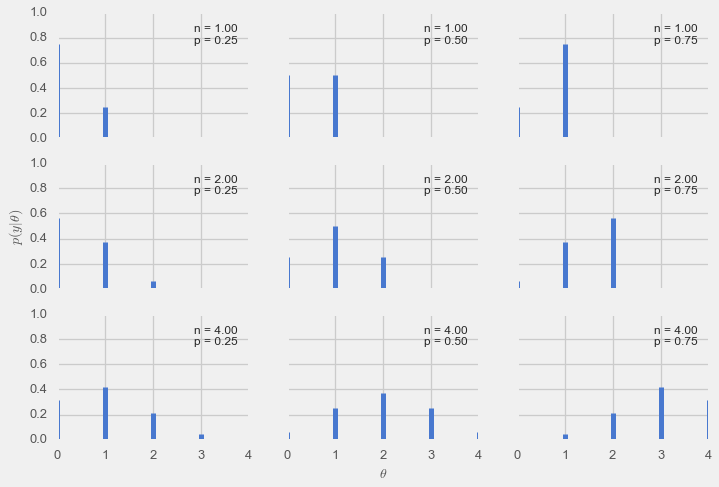

In [5]:
n_params = [1, 2, 4]
p_params = [0.25, 0.5, 0.75]
x = np.arange(0, max(n_params)+1)
f, ax = plt.subplots(len(n_params), len(p_params), sharex=True, 
  sharey=True)
for i in range(3):
    for j in range(3):
        n = n_params[i]
        p = p_params[j]
        y = stats.binom(n=n, p=p).pmf(x)
        ax[i,j].vlines(x, 0, y, colors='b', lw=5)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="n = {:3.2f}\np = {:3.2f}".format(n, p), alpha=0)
        ax[i,j].legend(fontsize=12)
ax[2,1].set_xlabel('$\\theta$', fontsize=14)
ax[1,0].set_ylabel('$p(y|\\theta)$', fontsize=14)
ax[0,0].set_xticks(x)
plt.savefig('B04958_01_03.png', dpi=300, figsize=(5.5, 5.5))

# Choosing the Prior

As a prior we will use the **beta distribution**, which is a very common distribution in Bayesian statistics and looks like this:

$
p(\theta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} \theta^{\alpha - 1} (1-\theta)^{\beta-1}
$

If we look carefully we will see that the beta distribution looks similar to the binomial except for the term with the $\Gamma$. This is the Greek uppercase gamma letter and represents what is known as the **gamma function**. All that we care about at this point is that the first term is anormalization constant that ensures the distribution integrates to 1 and that the beta distribution has two parameters, $\alpha$ and $\beta$, that control the distribution. Using the following code, we will explore our third distribution so far:



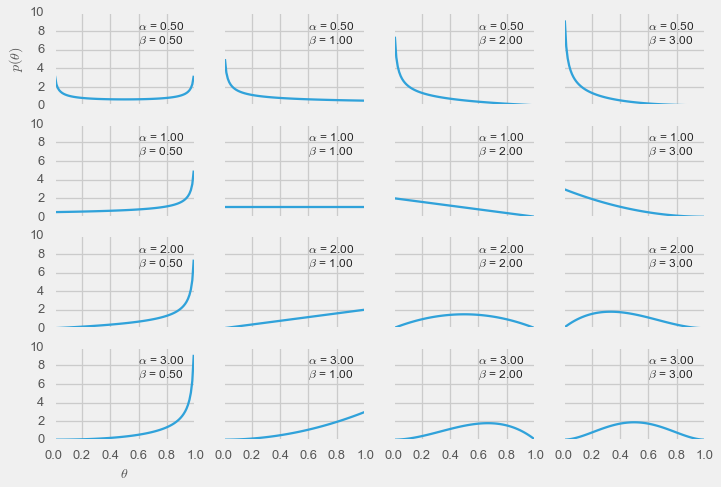

In [6]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, 
  sharey=True)
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(a, b), alpha=0)
        ax[i,j].legend(fontsize=12)
ax[3,0].set_xlabel('$\\theta$', fontsize=14)
ax[0,0].set_ylabel('$p(\\theta)$', fontsize=14)
plt.savefig('B04958_01_04.png', dpi=300, figsize=(5.5, 5.5))

OK, the beta distribution is nice, but why are we using it for our model? There are many reasons to use a beta distribution for this and other problems. One of them is that the beta distribution is restricted to have arguments between 0 and 1, in the same way our parmeter $\theta$ is. another reason is its versatility. As we can see in the preceding figure, the distribution adopts several _shapes_, including a uniform distribution, Gaussian-like distributions, U-like distributions, and so on. A third reason is that the beta distribution is the **conjugate prior** of the binomial distribution (which we are using as the likelihood). A conjugatge prior of a likelihood is a prior that, when used in combination with the given likelihoodm returns a posterior with the same functional form as the prior. Untwisting the tongue, every time we use a beta distribution as prior and a binomial distribution as likelihood, we will get a beta as a posterior. There are other pairs of conjugate priors, for example, the Gaussian distribution is the conjugate prior of itself. For many years, Bayesian analysis was restricted to the use of conjugate priors. Conjugacy ensures mathematical tractability of the posterior, which is imoprtant given that a common problem in Bayesian statistics is to end up with a posterior we cannot solve analytically. This was a deal breaker before the development of suitable computational methods to solve any possible posterior. From the next chapter on, we will learn how to use modern compuational methods to solve Bayesian problems whether we choose conjugate priors or not.


# Getting the Posterior

Let's remember Bayes' theorem says that the posterior is proportional to the likelihood times the prior:

$
p(\theta \hspace{.1cm} | \hspace{.1cm}) \propto p(y \hspace{.1cm} | \hspace{.1cm} \theta) p(\theta)
$

So for our problem, we have to multiply the binomial and the beta distributions:

$
p(\theta \hspace{.1cm} | \hspace{.1cm}) \propto \frac{N!}{N!(N-y)!} \theta^{y}(1-\theta)^{N-y} \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} \theta^{\alpha - 1} (1-\theta)^{\beta-1}
$

Now let's simplify this expression. For our practical concerns we can drop all terms that do not depend on $\theta$ and our results will still be valid. So we can write the following:

$
p(\theta \hspace{.1cm} | \hspace{.1cm}) \propto \theta^{y}(1-\theta)^{N-y} \theta^{\alpha - 1} (1-\theta)^{\beta-1}
$

Reordering, we get the following:

$
p(\theta \hspace{.1cm} | \hspace{.1cm}) \propto \theta^{\alpha - 1 + y}(1 - \theta)^{\beta - 1 + N - y}
$

If we pay attention, we wil see that this expression has the same functional form of a beta distribution (except for the normalization) with 

$
\alpha_{posterior} = \alpha_{prior} +y$

$\beta_{posterior} = \beta_{prior} + N - y$



# Computing and Plotting the Posterior

Now that we hvae the analyutical expression for the posterior, let's use python to compute it and plot the results. In the following code you will see that there is acutally just one line that computes the results while the others are there just ot plot them.

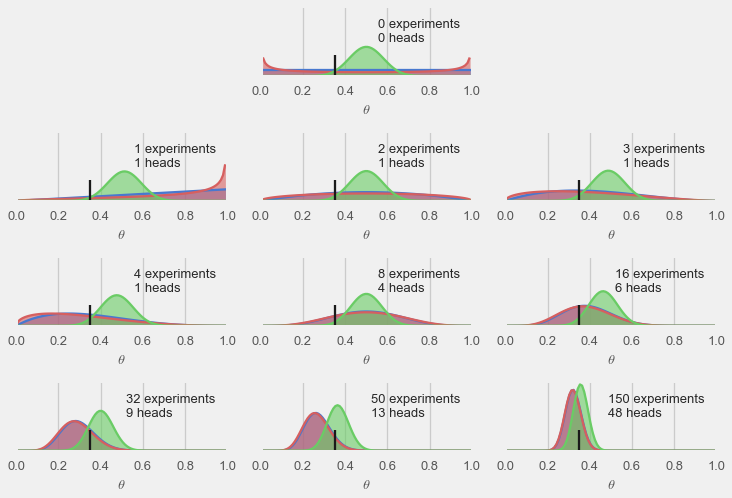

In [8]:
theta_real = 0.35
trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = stats.beta
x = np.linspace(0, 1, 100)

for idx, N in enumerate(trials):
    if idx == 0:
        plt.subplot(4,3, 2)
    else:
        plt.subplot(4,3, idx+3)
    y = data[idx]
    for (a_prior, b_prior), c in zip(beta_params, ('b', 'r', 'g')):
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.plot(x, p_theta_given_y, c)
        plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label="{:d} experiments\n{:d} heads".format(N, y), alpha=0)
    plt.xlim(0,1)
    plt.ylim(0,12)
    plt.xlabel(r"$\theta$") 
    plt.legend()
    plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('B04958_01_05.png', dpi=300, figsize=(5.5, 5.5))

C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


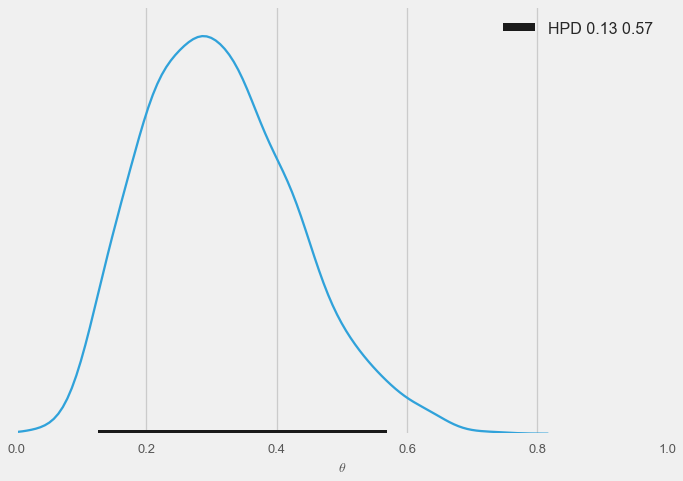

In [9]:
def naive_hpd(post):
    sns.kdeplot(post)
    HPD = np.percentile(post, [2.5, 97.5])
    plt.plot(HPD, [0, 0], label='HPD {:.2f} {:.2f}'.format(*HPD), 
      linewidth=8, color='k')
    plt.legend(fontsize=16);
    plt.xlabel(r"$\theta$", fontsize=14)
    plt.gca().axes.get_yaxis().set_ticks([])

    
np.random.seed(1)
post = stats.beta.rvs(5, 11, size=1000)
naive_hpd(post)
plt.xlim(0, 1)
plt.savefig('B04958_01_07.png', dpi=300, figsize=(5.5, 5.5))

C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


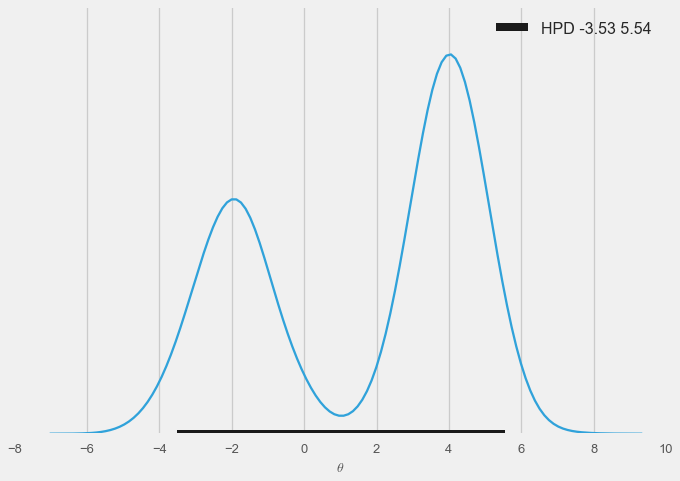

In [10]:
np.random.seed(1)    
gauss_a = stats.norm.rvs(loc=4, scale=0.9, size=3000)
gauss_b = stats.norm.rvs(loc=-2, scale=1, size=2000)
mix_norm = np.concatenate((gauss_a, gauss_b))

naive_hpd(mix_norm)
plt.savefig('B04958_01_08.png', dpi=300, figsize=(5.5, 5.5))

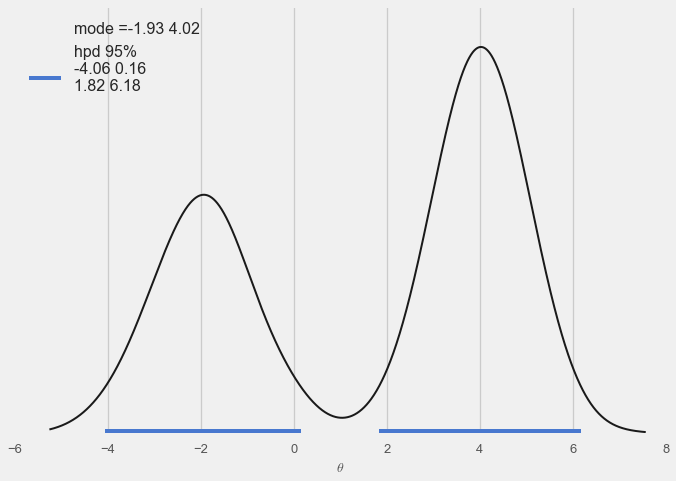

In [14]:
from plot_post import plot_post
plot_post(mix_norm, roundto=2, alpha=0.05)
plt.legend(loc=0, fontsize=16)
plt.xlabel(r"$\theta$", fontsize=14)
plt.savefig('B04958_01_09.png', dpi=300, figsize=(5.5, 5.5))